The data has been cleaned and normalized in the ETA stage. It made sense to also check for duplicates and missing values in the context of ETA, in case adjustments to the data should be made. 

I am now working with two dataframes, df_hechos and df_victimas. In this phase I want to: 
- Explore and understand the data, making connections where appropriate
- The following values will be visualized from the Hechos table: 
-- date (month), time, type of street, neighborhood, participants, victims, and accused
The following values will be visualized from the Victimas table: 
-- sex, victim, role

Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import datetime


In [ ]:
Load data

In [70]:
# Load the Excel file
file_path = ('./hechos.xlsx')
all_sheets = pd.read_excel(file_path, sheet_name=None)

In [6]:
# Load the Excel file
file_path = ('./victimas.xlsx')
all_sheets = pd.read_excel(file_path, sheet_name=None)

Create dataframes with pandas

In [7]:

df_hechos = pd.read_excel('hechos.xlsx')


In [8]:

df_victimas = pd.read_excel('victimas.xlsx')


In [10]:
# Display column names of df_hechos DataFrame
print("Column names of df_hechos DataFrame:")
print(df_hechos.columns)

# Display column names of df_victimas DataFrame
print("\nColumn names of df_victimas DataFrame:")
print(df_victimas.columns)


Column names of df_hechos DataFrame:
Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'PERIODO'],
      dtype='object')

Column names of df_victimas DataFrame:
Index(['ID_hecho', 'ID_victimas', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL',
       'VICTIMA', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO', 'victim_count'],
      dtype='object')


In [12]:
# Assuming 'df_hechos' is your DataFrame
counts_per_year = df_hechos['AAAA'].value_counts()

print("Count of each unique value in column 'AAAA':")
print(counts_per_year)


Count of each unique value in column 'AAAA':
AAAA
2016    144
2018    143
2017    131
2019    102
2021     97
2020     78
Name: count, dtype: int64


__Totals__

Start with the basics. How many total accidents and victims year on year for duration of our data (2016 - 2021.)

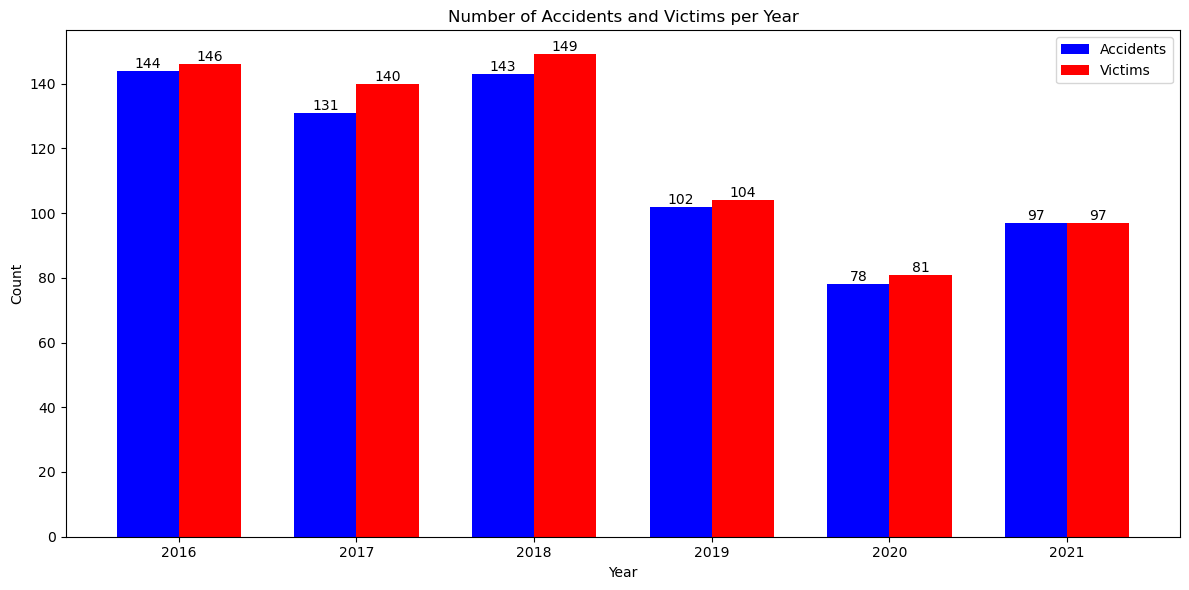

In [24]:
# Group df_hechos data by year and calculate total number of accidents
accidents_per_year = df_hechos['AAAA'].value_counts().sort_index()

# Group df_victimas data by year and calculate total number of victims
victims_per_year = df_victimas['AAAA'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))

# Set the width of each bar
bar_width = 0.35

# Define the x coordinates for the bars
x_accidents = accidents_per_year.index - bar_width / 2
x_victims = victims_per_year.index + bar_width / 2

# Plot accidents
plt.bar(x_accidents, accidents_per_year.values, width=bar_width, color='blue', label='Accidents')

# Plot victims
plt.bar(x_victims, victims_per_year.values, width=bar_width, color='red', label='Victims')

# Add labels to the top of each bar
for x, y in zip(x_accidents, accidents_per_year.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

for x, y in zip(x_victims, victims_per_year.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Accidents and Victims per Year')
plt.legend()

plt.tight_layout()
plt.show()


__Victim Profile__

Let's dig into the victims category. 

Looking at the data sets, we have several datapoints to compare:
1. Role
2. Gender
3. Age
4. Method of Locomotion

To begin, what is the correlation between roles and gender? 

**I am eleminating the null values from the totals as there is no useful information to be gained.**

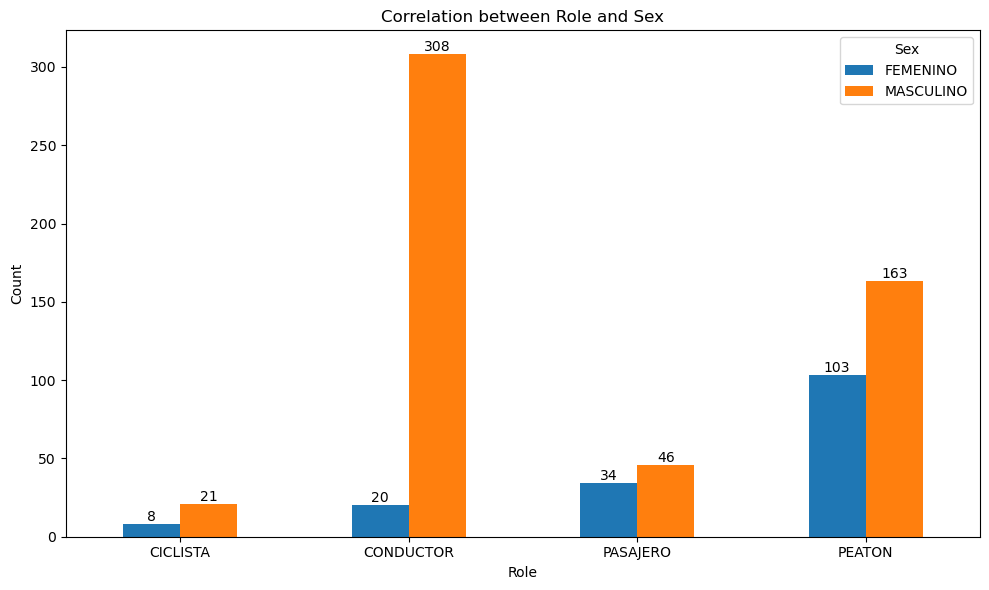

In [31]:
# Filter out rows where both 'ROL' and 'SEXO' are not equal to 'SD'
df_filtered = df_victimas[(df_victimas['ROL'] != 'SD') & (df_victimas['SEXO'] != 'SD')]

# Create a cross-tabulation of ROL and SEXO after filtering
cross_tab = pd.crosstab(df_filtered['ROL'], df_filtered['SEXO'])

# Plotting
ax = cross_tab.plot(kind='bar', figsize=(10, 6))

# Add labels to the top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Role')
plt.ylabel('Count')
plt.title('Correlation between Role and Sex')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Sex')  # Add legend with title
plt.tight_layout()
plt.show()


In every category, especially the role of driver, the majority of victims are male. Let's follow this thread. 

Is there a correlation between victim category and gender? 

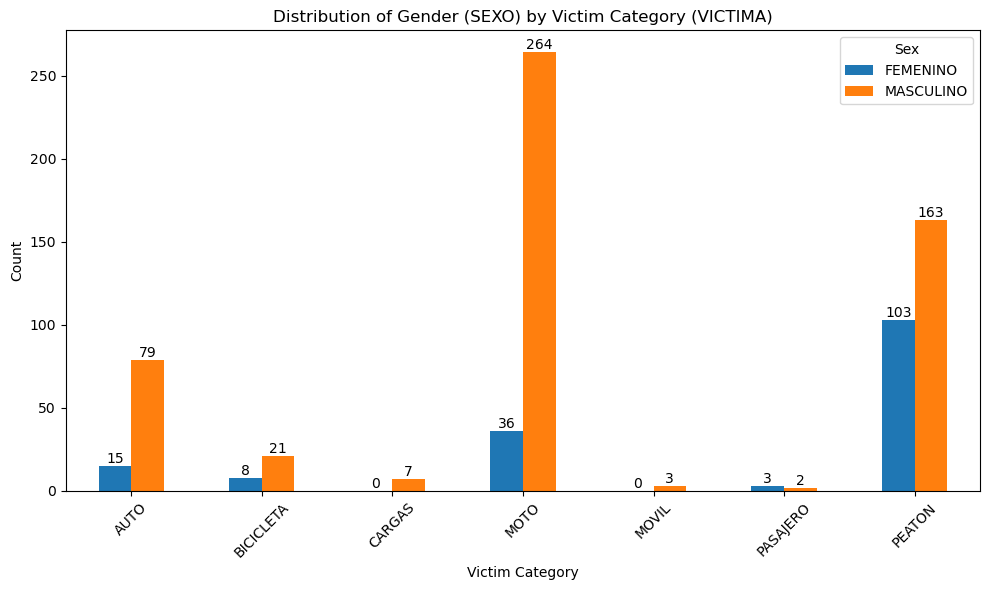

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_victimas with columns 'VICTIMA' and 'SEXO'

# Filter out rows where either 'VICTIMA' or 'SEXO' is equal to 'SD'
df_filtered = df_victimas[(df_victimas['VICTIMA'] != 'SD') & (df_victimas['SEXO'] != 'SD')]

# Create a cross-tabulation of VICTIMA and SEXO after filtering
cross_tab = pd.crosstab(df_filtered['VICTIMA'], df_filtered['SEXO'])

# Plotting
ax = cross_tab.plot(kind='bar', figsize=(10, 6))

# Add labels to the top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Victim Category')
plt.ylabel('Count')
plt.title('Distribution of Gender (SEXO) by Victim Category (VICTIMA)')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


Another strong correlation between gender and method of locomotion, especially in the motorcycle category.

There are still other factors to consider, such as age. First, in a line chart, let's evaluate how age correlates to fatal vehicle accidents. 

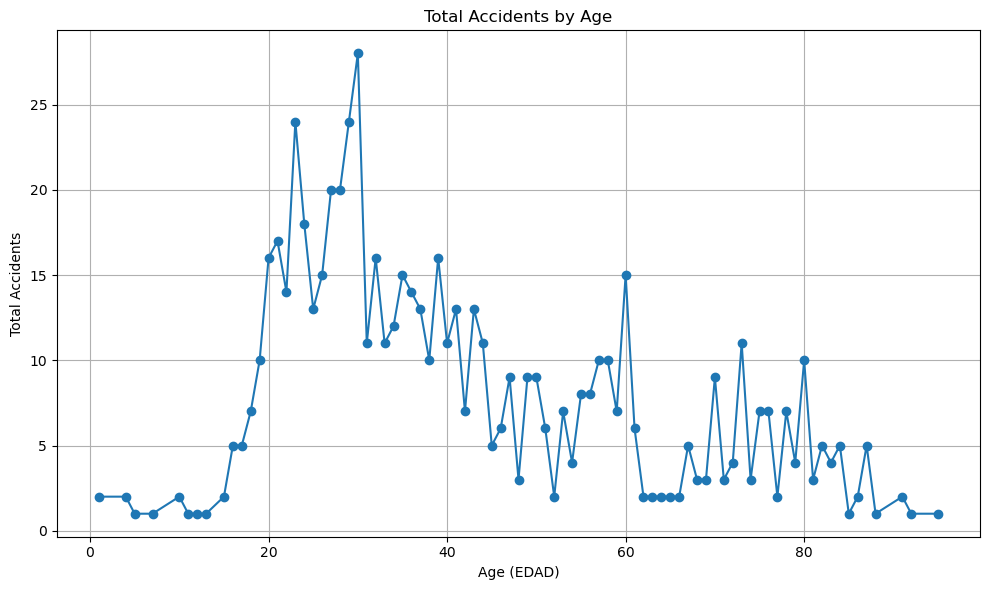

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_hechos with columns 'ID_hecho' and 'EDAD'

# Calculate the total number of accidents for each unique value in the 'EDAD' column
accidents_by_age = df_victimas['EDAD'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(accidents_by_age.index, accidents_by_age.values, marker='o', linestyle='-')
plt.xlabel('Age (EDAD)')
plt.ylabel('Total Accidents')
plt.title('Total Accidents by Age')
plt.grid(True)
plt.tight_layout()
plt.show()


The majority of victims are between 20-40 years old, with another small spike at 60. 

Returning to our strongest finding yet, let's evaluate the correlation between age and gender.

<Figure size 1000x600 with 0 Axes>

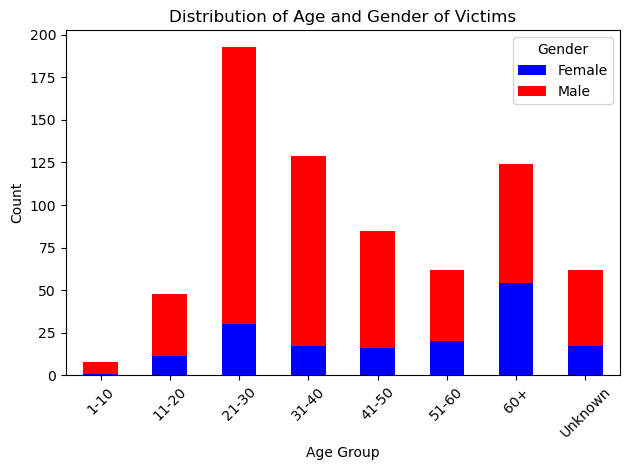

In [50]:
# Filter out 'SD' values from the 'EDAD' column
df_victimas = df_victimas[df_victimas['EDAD'] != 'SD']

# Filter out 'SD' values from the 'SEXO' column
df_victimas = df_victimas[df_victimas['SEXO'] != 'SD']

# Define the age groups
age_groups = {
    '1-10': range(1, 11),
    '11-20': range(11, 21),
    '21-30': range(21, 31),
    '31-40': range(31, 41),
    '41-50': range(41, 51),
    '51-60': range(51, 60),
    '60+': range(61, 150)  # Assuming anyone older than 60 falls into this category
}

# Group 'EDAD' into the specified age groups
def categorize_age(age):
    for group, range_values in age_groups.items():
        if age in range_values:
            return group
    return 'Unknown'

df_victimas['Age Group'] = df_victimas['EDAD'].apply(categorize_age)

# Count the number of male and female values in each age group
grouped_data = df_victimas.groupby(['Age Group', 'SEXO']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age and Gender of Victims')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()


As we can see, accross age demographics (and even when the age wasn't reported) there is a significant male bias. 

__Accident Profile__

In this section, we will shift focus from the victims to the details from the accidents themselves. 

There are four areas of focus: 
1. Time of year (by month)
2. Time of day (by hour and by period)
3. Location
4. Type of street

We will begin by analyzing time of year by month.

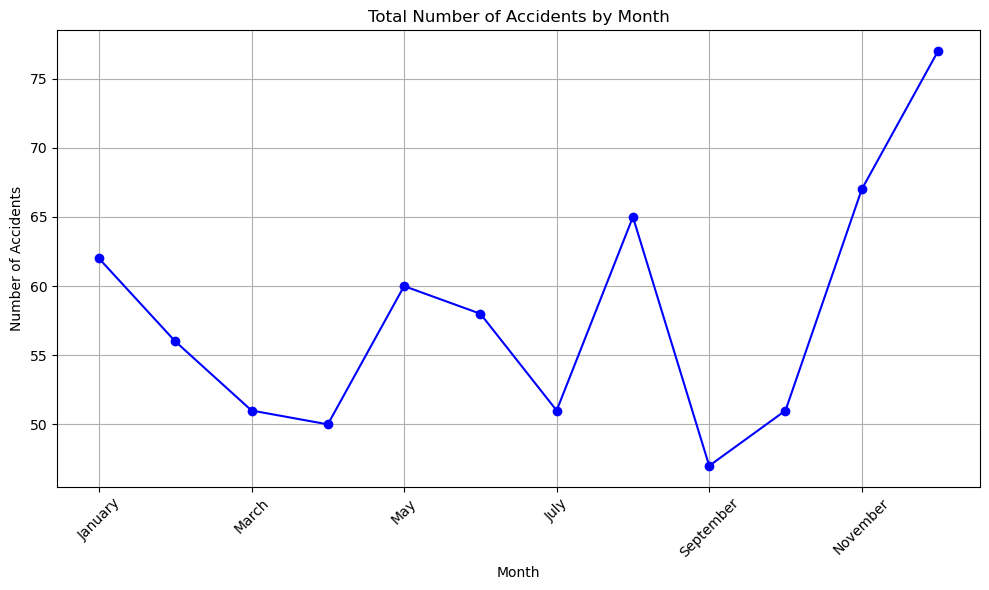

In [53]:
import calendar

# Assuming you have a DataFrame named df_hechos with columns 'ID' and 'MM'

# Group df_hechos data by month and calculate counts
accidents_per_month = df_hechos.groupby('MM')['ID'].count()

# Convert numerical month values to month names
month_names = [calendar.month_name[month] for month in range(1, 13)]
accidents_per_month.index = month_names

# Plotting
plt.figure(figsize=(10, 6))
accidents_per_month.plot(kind='line', marker='o', color='blue')

plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Total Number of Accidents by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()
plt.show()


Now we will focus on time of day, both by the hour and grouped into periods. 

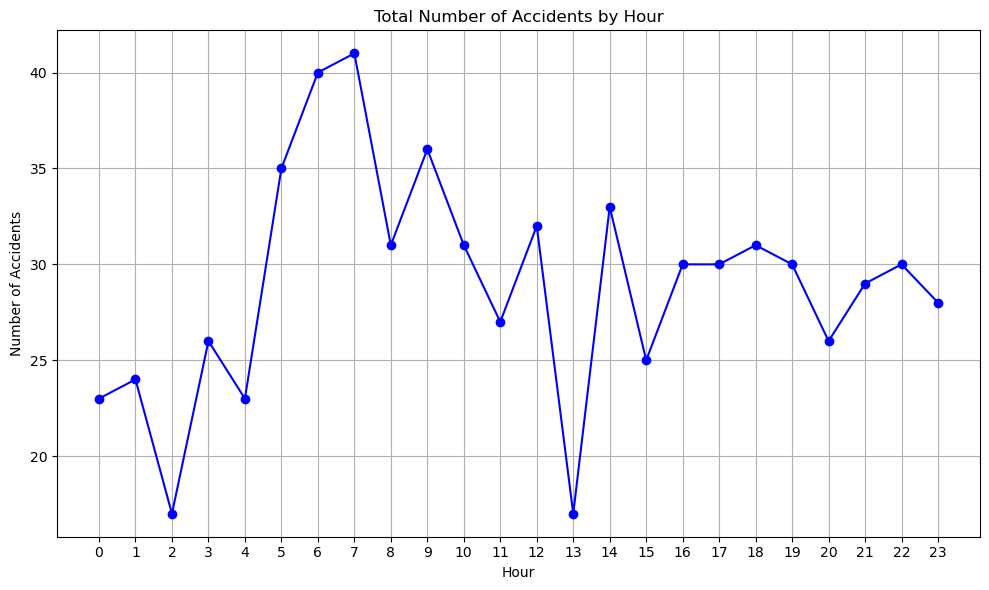

In [54]:
# Extract the hour component from the 'HORA' column
df_hechos['Hour'] = pd.to_datetime(df_hechos['HORA']).dt.hour

# Group df_hechos data by hour and calculate counts
accidents_per_hour = df_hechos.groupby('Hour')['ID'].count()

# Plotting
plt.figure(figsize=(10, 6))
accidents_per_hour.plot(kind='line', marker='o', color='blue')

plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.title('Total Number of Accidents by Hour')
plt.xticks(range(24))  # Set x-axis ticks to cover all 24 hours
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()
plt.show()


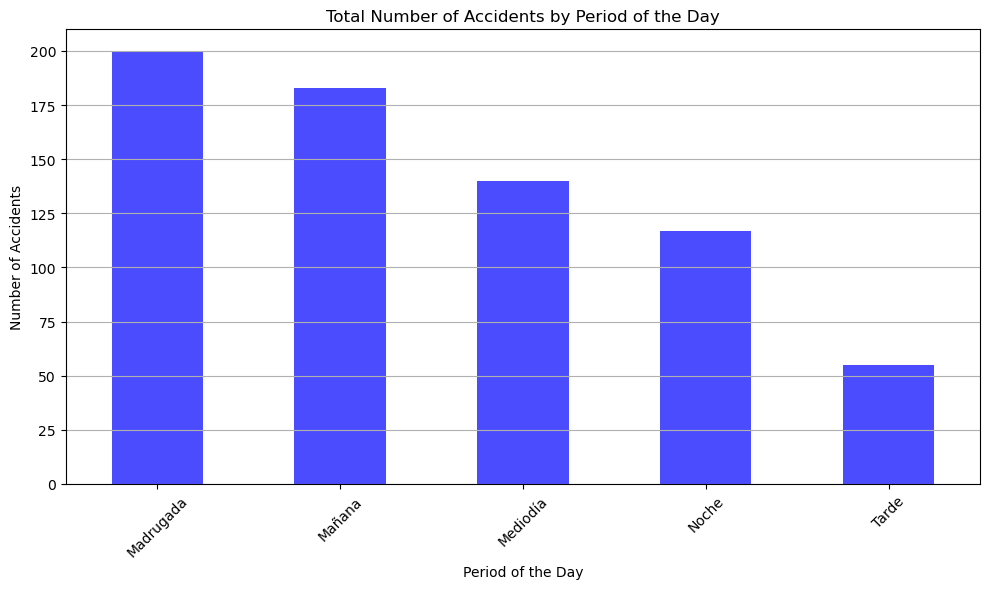

In [57]:
# Group df_hechos data by period and calculate counts
accidents_per_period = df_hechos['PERIODO'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
accidents_per_period.plot(kind='bar', color='blue', alpha=0.7)

plt.xlabel('Period of the Day')
plt.ylabel('Number of Accidents')
plt.title('Total Number of Accidents by Period of the Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for better readability on y-axis
plt.tight_layout()
plt.show()


Digging back into my original calculations for period of day, there is an error in the 'time of day' category (it excludes 12:01 - 5am). This should can be fixed in power bi. Even still, it is clear from comparing the two charts that the most dangerous time of day for motorvehicle deaths is the morning. 

Let's now compare street type. 

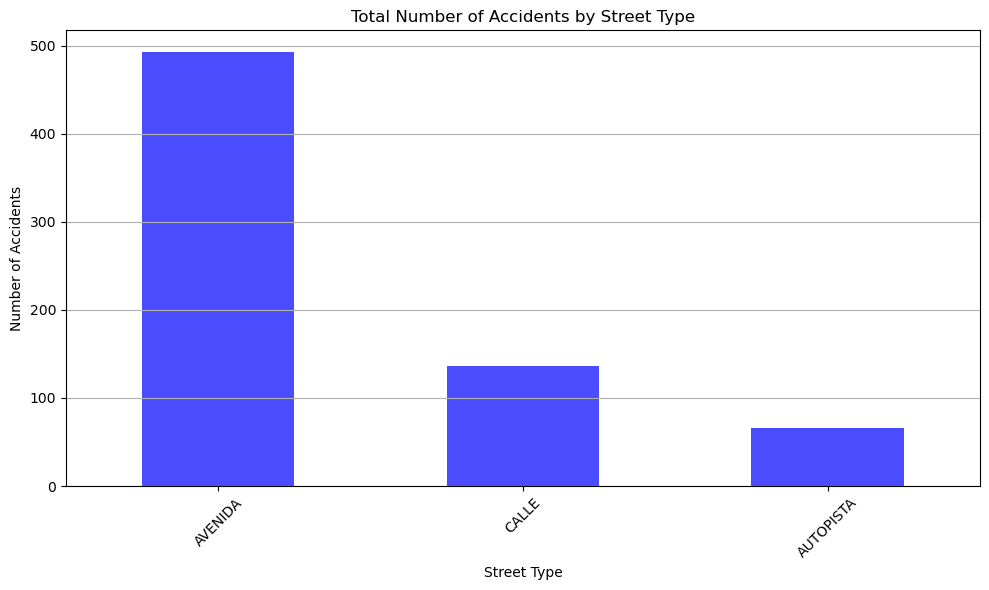

In [60]:

# Group df_hechos data by street type and calculate counts
accidents_per_street_type = df_hechos['TIPO_DE_CALLE'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
accidents_per_street_type.plot(kind='bar', color='blue', alpha=0.7)

plt.xlabel('Street Type')
plt.ylabel('Number of Accidents')
plt.title('Total Number of Accidents by Street Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for better readability on y-axis
plt.tight_layout()
plt.show()


The most accidents that produce fatalities happen on Avenida type streets. Let's look at the most common type of victims on each street type. 

<Figure size 1000x600 with 0 Axes>

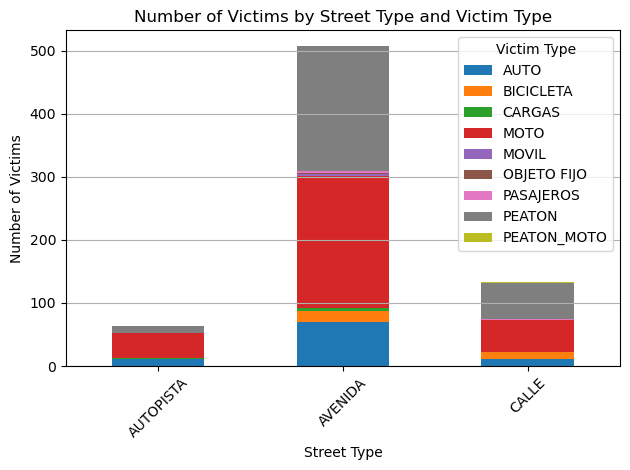

In [71]:
# Filter out 'SD' values from both DataFrames
df_hechos_filtered = df_hechos[df_hechos['TIPO_DE_CALLE'] != 'SD']
df_victimas_filtered = df_victimas[df_victimas['VICTIMA'] != 'SD']

# Merge the filtered DataFrames on their respective columns ('ID' and 'ID_hechos')
merged_df = pd.merge(df_hechos_filtered, df_victimas_filtered, left_on='ID', right_on='ID_hecho', how='inner')

# Group merged data by street type and victim type and calculate counts
grouped_data = merged_df.groupby(['TIPO_DE_CALLE', 'VICTIMA_x']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Street Type')
plt.ylabel('Number of Victims')
plt.title('Number of Victims by Street Type and Victim Type')
plt.xticks(rotation=45)
plt.legend(title='Victim Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


__Conclusions__

The strongest correlations of motor vehicle accidents resulting in death by category are: 
- Gender: men are more likely to die in an automobile accident in every category
- Age: the demographic most likely to die in an auto accident are between 20-30
- Street Type: Avenues are more likely to see deadly accidents than streets or highways
- Time of Day: the morning rush hour has the highest probabiity of accidents
- Month: December is the deadliest month for car accidents
- Role: Drivers are more likely to die than any other position
- Type of vehicle: motorcyles are the deadliest vehicle on the road by far